## XOR 게이트

### 1) 패키지 참조하기

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from tensorflow.keras.models import Sequential  #순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense       #모델 객체에 학습을 위한 층을 쌓는다.
from tensorflow.keras.optimizers import RMSprop #옵티마이저
from tensorflow.keras.losses import mse         #활성화함수
from pandas import DataFrame

### 2) 데이터 셋 준비하기

#### 랜덤 시드값 고정

In [3]:
np.random.seed(777)

#### 데이터 셋 구성
`XOR` 회로는 입력값이 동일한 경우 `False`, 입력값이 서로 다른 경우 `True`

In [4]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[1],[1],[0]])

### 3) 데이터 전처리
> 간단한 데이터 이므로 이 예제에서는 수행하지 X

### 4) 탐색적 데이터 분석

In [5]:
# flatten : 1차원으로 만들어줌.
label = train_y.flatten()
df = DataFrame(train_x, label, columns=['x1','x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
0,1,1


### 5) 데이터 셋 분할하기
> 훈련을 위한 데이터 자체가 워낙 양이 적기 때문에 여기서는 진행하지 않음

### 6) 모델 개발

#### 모델정의

In [6]:
#객체 생성
model = Sequential()

# 16=layers , 2개의 입력값, 활성화함수=relu
# 은닉층 (Hidden layers) : 16 -> 8(16/2) -> 4(8/2) -> 2(4/2)
model.add(Dense(16, input_shape=(2, ), activation = 'relu'))

# 최종결과가 단순 분류(0,1)인 경우 sigmoid를 써야하기 때문에 마지막 층은 sigmoid로 함
model.add(Dense(1, activation='sigmoid'))

# 최적화는 RMSprop 손실함수는 mse, metrics는 검증데이터의 검증방법
model.compile(optimizer = RMSprop(), loss=mse, metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65 (260.00 Byte)
Trainable params: 65 (260.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


계층수를 많이 주면 성능이 좋아질까? 최적의 값을 찾아야하는 거지 무조건 큰 수를 주는 것X
> 즉, layer = 정확도를 높이기 위한 최소한의 계층수
- 층이 1, 2인 경우 정확도 50%
- 층이 8인 경우 정확도 75%
- 층이 16, 32인 경우 정확도 100%

#### 학습하기

In [7]:
hist = model.fit(train_x, train_y, epochs=500)

result_df = DataFrame(hist.history)
result_df['epochs'] = result_df.index + 1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
1/1 [==============================] - 0s 299ms/step - loss: 0.2484 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2469 - acc: 0.2500
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2458 - acc: 0.2500
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2450 - acc: 0.2500
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2443 - acc: 0.2500
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2436 - acc: 0.2500
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2430 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.2424 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2419 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2414 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.241

,loss,acc
epochs,,
1,0.248353,0.50
2,0.246893,0.25
3,0.245847,0.25
4,0.245013,0.25
5,0.244278,0.25
...,...,...
496,0.088083,1.00
497,0.087885,1.00
498,0.087631,1.00


### 7) 학습 결과 평가

#### 학습 결과 시각화

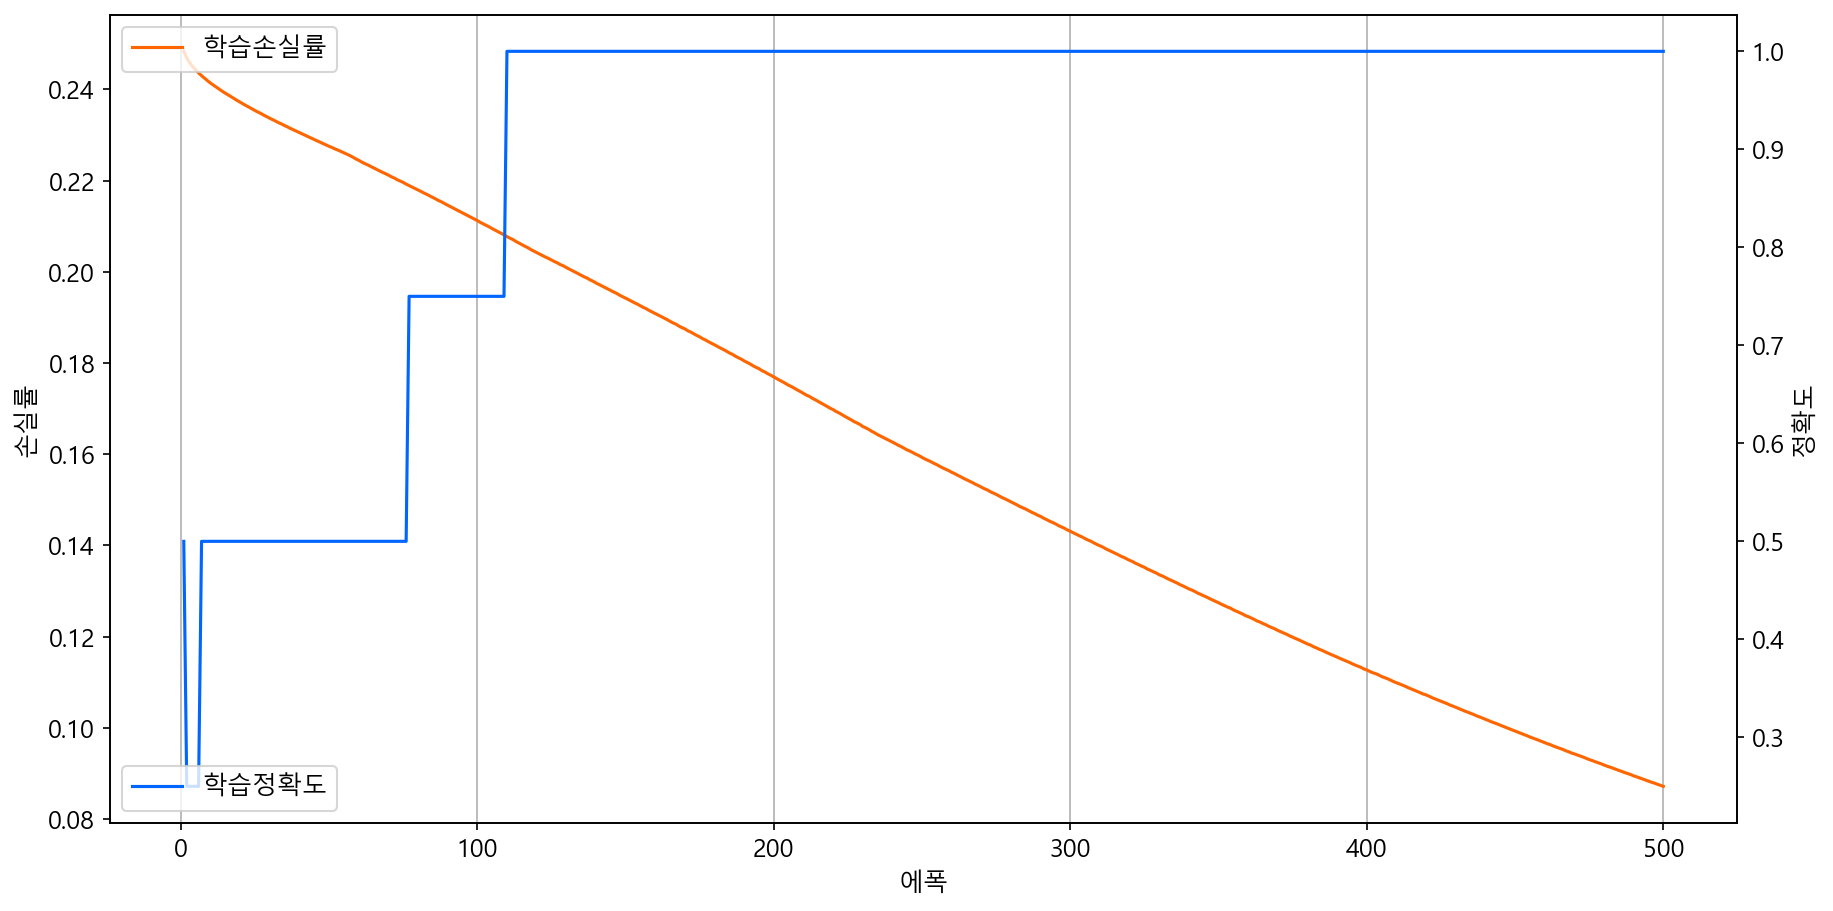

In [9]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12

fig, ax1 = plt.subplots(1,1,figsize=(14,7), dpi=150)
ax2 = ax1.twinx()

sb.lineplot(data=result_df, x=result_df.index, y='loss', color = "#ff6600", label='학습손실률', ax=ax1)
ax1.set_xlabel('에폭')
ax1.set_ylabel('손실률')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sb.lineplot(data=result_df, x=result_df.index, y='acc', color='#0066ff', label='학습정확도', ax=ax2)
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

#### 모델 성능 평가

In [10]:
ev = model.evaluate(train_x, train_y)
print("손실률: %0.2f, 정확도: %0.2f" % (ev[0], ev[1]))

1/1 [==============================] - 0s 125ms/step - loss: 0.0869 - acc: 1.0000
손실률: 0.09, 정확도: 1.00


####  가중치, 편향 확인

In [12]:
weights = model.get_weights()
weights

[array([[ 0.33540988, -0.5068084 , -0.53300744, -0.7295415 , -0.5774453 ,
         -0.5665272 ,  0.36612612,  0.12468522,  0.07438753,  0.5234912 ,
         -0.67680967,  0.33275414, -0.36885795, -0.51646763, -0.16758984,
          0.8295359 ],
        [ 0.3396594 ,  0.508144  ,  0.5317767 ,  0.72986364,  0.5784351 ,
          0.5673367 ,  0.843174  , -0.13818005, -0.01969509, -0.5173907 ,
          0.6780981 ,  0.5070124 , -0.12474817, -0.48164466, -0.5583957 ,
         -0.74125934]], dtype=float32),
 array([-3.38398397e-01, -8.99133971e-04, -6.48528221e-05, -4.41405486e-04,
        -1.31084677e-03, -1.05341955e-04, -3.67537141e-01, -1.26233578e-01,
        -7.60869682e-02, -4.38643619e-04, -4.83440002e-04, -3.32424462e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  7.37538852e-04],
       dtype=float32),
 array([[-0.45500025],
        [ 0.5246202 ],
        [ 0.60130894],
        [ 0.61781603],
        [ 1.0412765 ],
        [ 0.47573686],
        [-0.82946944],
    

In [13]:
# 2차원 배열 - 입력층과 은닉층을 연결하는 가중치
print(weights[0].shape)

# 1차원 배열 - 은닉층의 편향
print(weights[1].shape)

# 2차원 배열 - 은닉층과 출력층을 연결하는 가중치
print(weights[2].shape)

# 1차원 배열 - 출력층의 편향
print(weights[3].shape)

(2, 16)
(16,)
(16, 1)
(1,)


### 8) 학습 결과 적용

In [14]:
r = model.predict(train_x)
df['예측값'] = r.reshape(-1).round()
df

1/1 [==============================] - 0s 78ms/step


,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
0,1,1,0.0
